In [1]:
#imports
import networkx as nx
import fastobo
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout

In [2]:
obo = fastobo.load('go-basic.obo')
knowledge_graph = nx.DiGraph()

In [12]:
for frame in obo:
    if isinstance(frame, fastobo.term.TermFrame):
        name=str(frame[0]).replace('namespace: ', '')
        knowledge_graph.add_node(str(frame.id), NAME=name)
    for clause in frame:
        if isinstance(clause, fastobo.term.IsAClause):
            knowledge_graph.add_edge(str(frame.id), str(clause.term))

In [13]:
nx.is_directed_acyclic_graph(knowledge_graph)

True

In [5]:
with open('put_reg_go.txt', 'r') as go:
    gos = go.readlines()
    regulatory_gos = [i.replace('\n', '') for i in gos]
    print(len(regulatory_gos),regulatory_gos)

414 ['GO:0044325', 'GO:0000976', 'GO:0006888', 'GO:0042025', 'GO:0045122', 'GO:0042981', 'GO:0019781', 'GO:0003950', 'GO:0016586', 'GO:0016987', 'GO:0017183', 'GO:0045600', 'GO:0004864', 'GO:0030238', 'GO:0007015', 'GO:0035198', 'GO:0006282', 'GO:0005694', 'GO:2000031', 'GO:0097367', 'GO:0006391', 'GO:0006351', 'GO:0016514', 'GO:0009432', 'GO:0009909', 'GO:0009890', 'GO:0009736', 'GO:0004402', 'GO:0006813', 'GO:0019901', 'GO:0000166', 'GO:0044781', 'GO:0003697', 'GO:0035307', 'GO:1901894', 'GO:0000126', 'GO:0006011', 'GO:0010045', 'GO:0045116', 'GO:0005643', 'GO:0005524', 'GO:0042176', 'GO:0019629', 'GO:0042372', 'GO:0000981', 'GO:0042054', 'GO:0015074', 'GO:0016197', 'GO:0031931', 'GO:0001228', 'GO:0000439', 'GO:0004523', 'GO:0007165', 'GO:0007420', 'GO:0004222', 'GO:0042174', 'GO:0002218', 'GO:0050709', 'GO:0006959', 'GO:0008380', 'GO:0000226', 'GO:0004842', 'GO:0009347', 'GO:0031929', 'GO:2000146', 'GO:0010468', 'GO:0031449', 'GO:0019348', 'GO:0016790', 'GO:0006265', 'GO:0031554', '

In [6]:
g = regulatory_gos #terminos padre
reg_gos = [] #guarda los gos hijos junto los padres

for i in g:
    superclass_nodes = nx.ancestors(knowledge_graph, i)
    superclass_nodes.add(i)
    super_graph = knowledge_graph.subgraph(superclass_nodes)
    nodes_info = nx.get_node_attributes(super_graph, 'NAME')
    n = [go for go in nodes_info.keys()]
    reg_gos.extend(n)
reg_gos = set(reg_gos)

In [14]:
### GO's regulatorios supuestos con el filtro de interpro
r = knowledge_graph.subgraph(reg_gos)
nx.get_node_attributes(r, 'NAME')

{'GO:0014885': 'name: detection of injury involved in regulation of muscle adaptation',
 'GO:0001717': 'name: conversion of seryl-tRNAsec to selenocys-tRNAsec',
 'GO:1903800': 'name: positive regulation of miRNA processing',
 'GO:0001537': 'name: N-acetylgalactosamine 4-O-sulfotransferase activity',
 'GO:0033212': 'name: iron import into cell',
 'GO:0070237': 'name: positive regulation of activation-induced cell death of T cells',
 'GO:0002046': 'name: opsin binding',
 'GO:0019730': 'name: antimicrobial humoral response',
 'GO:0046535': 'name: detection of chemical stimulus involved in sensory perception of umami taste',
 'GO:0102216': 'name: maltodextrin water dikinase',
 'GO:0001010': 'name: RNA polymerase II sequence-specific DNA-binding transcription factor recruiting activity',
 'GO:0043518': 'name: negative regulation of DNA damage response, signal transduction by p53 class mediator',
 'GO:0075257': 'name: positive regulation of teliospore formation',
 'GO:0007510': 'name: cardio

In [15]:
regulatory_graph = knowledge_graph.subgraph(regulatory_gos)
regulatory_graph.number_of_nodes()
reg_gos_info = nx.get_node_attributes(regulatory_graph, 'NAME')
reg_gos_namespaces = Counter(reg_gos_info.values())
reg_gos_namespaces_per = {name:(count/len(reg_gos_info)*100) for name, count in reg_gos_namespaces.items()}


In [16]:
reg_gos_namespaces

Counter({'name: host cell nucleus': 1,
         'name: transcription factor binding': 1,
         'name: DNA replication': 1,
         'name: COPII vesicle coat': 1,
         'name: RNA-DNA hybrid ribonuclease activity': 1,
         'name: septin ring': 1,
         'name: SHREC complex': 1,
         'name: intracellular calcium ion homeostasis': 1,
         'name: RNA polymerase II cis-regulatory region sequence-specific DNA binding': 1,
         'name: structural molecule activity': 1,
         'name: adenyl-nucleotide exchange factor activity': 1,
         'name: metalloendopeptidase activity': 1,
         'name: protein-folding chaperone binding': 1,
         'name: NAD biosynthetic process': 1,
         'name: steroid biosynthetic process': 1,
         'name: Mon1-Ccz1 complex': 1,
         'name: 1,4-dihydroxy-2-naphthoyl-CoA synthase activity': 1,
         'name: phosphatase binding': 1,
         'name: miRNA binding': 1,
         'name: vesicle targeting, trans-Golgi to endosome

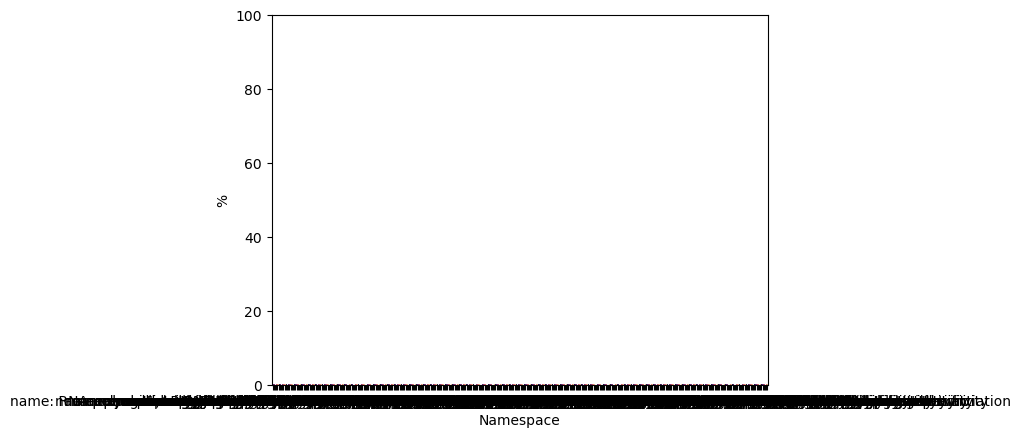

In [8]:
#ploteando datos
keys = list(reg_gos_namespaces_per.keys())
vals = [float(reg_gos_namespaces_per[k]) for k in keys]
fig, ax = plt.subplots()
plt.ylabel('%')
plt.xlabel('Namespace')
sns.barplot(x=keys, y=vals, ax=ax, palette=sns.color_palette("magma"))
ax.set_ylim(0, 100)
plt.show()

In [63]:
# go = 'GO:0019619'
superclass_nodes = nx.descendants(knowledge_graph, regulatory_gos)
superclass_nodes.add(go)
super_graph = knowledge_graph.subgraph(superclass_nodes)
nodes_info = nx.get_node_attributes(super_graph, 'NAME')

TypeError: unhashable type: 'list'

In [19]:
from matplotlib import pyplot as plt
pos = nx.spring_layout(super_graph)
node_labels = nx.get_node_attributes(super_graph, 'NAME')

n = {got:name for got, name in nx.get_node_attributes(super_graph, 'NAME').items() if got != go}
n


{'GO:0042537': 'biological_process',
 'GO:0018958': 'biological_process',
 'GO:1901360': 'biological_process',
 'GO:0043436': 'biological_process',
 'GO:0071704': 'biological_process',
 'GO:0044281': 'biological_process',
 'GO:0008152': 'biological_process',
 'GO:0006725': 'biological_process',
 'GO:0019439': 'biological_process',
 'GO:0072329': 'biological_process',
 'GO:1901615': 'biological_process',
 'GO:1901361': 'biological_process',
 'GO:0016054': 'biological_process',
 'GO:0019336': 'biological_process',
 'GO:0019752': 'biological_process',
 'GO:1901575': 'biological_process',
 'GO:1901616': 'biological_process',
 'GO:0019614': 'biological_process',
 'GO:0044248': 'biological_process',
 'GO:0009987': 'biological_process',
 'GO:0044237': 'biological_process',
 'GO:0009712': 'biological_process',
 'GO:0046395': 'biological_process',
 'GO:0046278': 'biological_process',
 'GO:0008150': 'biological_process',
 'GO:0044282': 'biological_process',
 'GO:0032787': 'biological_process',
 

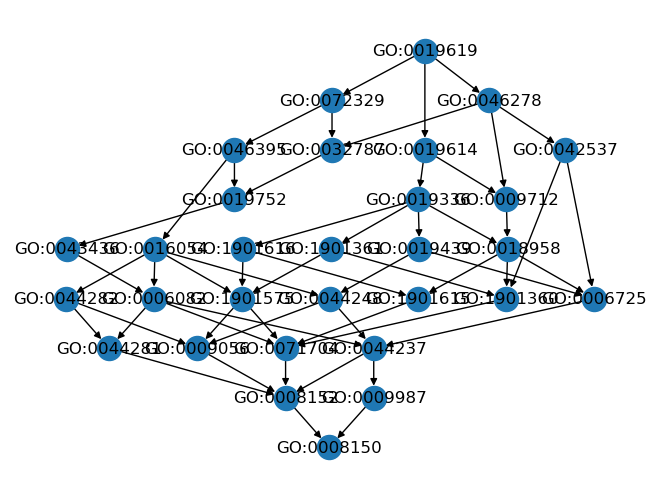

In [21]:
nx.draw(super_graph, pos=graphviz_layout(super_graph, prog="dot"), with_labels=True, arrows=True)